In [1]:

import os
os.chdir('..')

In [2]:


import sys
import os
print(os.getcwd())
sys.path.insert(0,'/home/mariia.sidulova/scdn/DomId')
sys.path.insert(0, '/home/mariia.sidulova/scdn/DomId/DomainLab')

from domid.tasks.task_weah import NodeTaskWEAH
from domid.arg_parser import mk_parser_main
from domid.dsets.dset_weah import DsetWEAH
import matplotlib.pyplot as plt
import torch.utils.data
%matplotlib inline

/home/mariia.sidulova/scdn/DomId


In [3]:
sys.path.insert(0,'/home/mariia.sidulova/scdn/DomId')
sys.path.insert(0, '/home/mariia.sidulova/scdn/DomId/DomainLab')

In [4]:
import pandas as pd
data = pd.read_csv('../../Aperio_dataset_v10.csv')

In [5]:

column_names = ['path', 'subject', 'region', 'ann', 'resp', 'age', 'BMI', 'Init_dx']
new_df = pd.DataFrame(columns = column_names)

In [6]:
# sub_counter = -1
# for ii in range(0, len(data)):
#     print(ii, 'out of', len(data))
#     name = data['Filename of initial Aperio slide'][ii]
#     if name[0]=='A':
#         name_ = 'aperio'+name[6:12]
#         path = '../../data_Outside/png_files/Training/'+name_
#         if os.path.exists(path):
#             sub_counter+=1
#             region_set =[]
#             for img in os.listdir(path): 
#                 if img[0]=='a':
#                     if img.split('_')[5]!='Aug': #not augmented
#                         region_set_ =[]
#                         region_set_ = region_set+[img.split('_')[4]]
                    
#                         if len(set(region_set_))<5:
#                             region_set.append(img.split('_')[4])
                            
#                             responder = data['Responder'][ii]
#                             age = data['Age at dx'][ii]
#                             BMI = data['BMI'][ii]
#                             init_dx = data['Initial dx'][ii]
                            
#                             # region_label_ = img.split('_')[4][1:]
#                             # if region_label_=='CAH':
#                             #     region_label = 0
#                             # elif region_label_=='Carcinoma':
#                             #     region_label =1
#                             # else:
#                             #     region_lbel = 3
#                             if responder == 'Y':
#                                 resp = 1
#                             else:
#                                 resp = 0
#                             ann = int(img.split('_')[2])

#                             row ={'path':img, 'subject':sub_counter,'region':img.split('_')[4], 'ann':ann, 'resp':resp, 'age':age, 'BMI':BMI, 'Init_dx':init_dx}
#                             #new_df=new_df.append(row, ignore_index=True)
            
#                             df_new_row = pd.DataFrame(row, index=[0])
                      
#                             new_df = pd.concat([new_df, df_new_row], axis=0, ignore_index=True)
    
#         print(len(set(region_set)), len(region_set_))
# #     if sub_counter>25:
# #         break
                        
#                     #print(row)

# print(new_df)



In [7]:
data = pd.read_csv('../../Aperio_dataset_v10.csv')

In [8]:
data

Patient ID Initial dx Comments about initial dx slide  \
0             1        CAH                             NaN   
1             2        CAH                             NaN   
2             4        CAH                             NaN   
3             5        CAH                             NaN   
4             6        CAH                             NaN   
..          ...        ...                             ...   
107         184        CAH                             NaN   
108         186        CAH                             NaN   
109         187        CAH                             NaN   
110         189        CAH                             NaN   
111         191        CAH                             NaN   

    Filename of initial Aperio slide Filename of initial 3D Histech slide  \
0                   APERIO-001-0.SVS                    3DHISTECH-1-0.SVS   
1                   APERIO-002-0.SVS                    3DHISTECH-2-0.SVS   
2                   APERIO-004-0.SVS                    3DHISTECH-4-0.SVS   
3                   APERIO-005-0.SVS                    3DHISTECH-5-0.SVS   
4                   APERIO-006-0.SVS                    3DHISTECH-6-0.SVS   
..                               ...                                  ...   
107                     BA-26-84.SVS                             1M10.SVS   
108                     BA-28-77.SVS                             1M05.SVS   
109                     BA-29-13.SVS                             1M13.SVS   
110                   BA-31-51 A.SVS                             1M01.SVS   
111                  BA-32-18 HE.SVS                             1M04.SVS   

    Responder  Age at dx    BMI  BMICAT   Race  ... Benign_Length  \
0           Y       39.0  37.30   M_BMI    WNH  ...           0.0   
1           Y       28.0  28.20   L_BMI     WH  ...           0.0   
2           N       28.0  46.70   H_BMI    WNH  ...           0.0   
3           Y       32.0  36.00   M_BMI    WNH  ...      157995.2   
4           Y       35.0  27.78   L_BMI  ASIAN  ...       72512.7   
..        ...        ...    ...     ...    ...  ...           ...   
107         Y       56.0  65.90  VH_BMI    WNH  ...           0.0   
108         N       34.0  43.50   M_BMI   AANH  ...           0.0   
109         Y       43.0  59.60  VH_BMI    WNH  ...           0.0   
110         Y       64.0  62.30  VH_BMI    WNH  ...           0.0   
111         Y       59.0  56.50  VH_BMI    WNH  ...           0.0   

    CAH_Length_Micron Carcinoma_Length_Micron Benign_Length_Micron  \
0             14673.3                     0.0                  0.0   
1             13430.6                  3530.1                  0.0   
2             11015.0                  9589.0                  0.0   
3             16255.9                  5999.2              40020.2   
4             14652.0                     0.0              18367.6   
..                ...                     ...                  ...   
107           21467.4                     0.0                  0.0   
108               0.0                  6258.2                  0.0   
109          112919.9                     0.0                  0.0   
110           46515.2                     0.0                  0.0   
111           31639.6                     0.0                  0.0   

    SVS Num Scenes SVS Scene Name               SVS Rect  SVS Num Channels  \
0                1          IMAGE  (0, 0, 157368, 84574)                 3   
1                1          IMAGE  (0, 0, 123503, 38380)                 3   
2                1          IMAGE  (0, 0, 101592, 92341)                 3   
3                1          IMAGE  (0, 0, 135456, 75813)                 3   
4                1          IMAGE  (0, 0, 125495, 87592)                 3   
..             ...            ...                    ...               ...   
107              1          IMAGE   (0, 0, 47808, 43099)                 3   
108              1          IMAGE   (0, 0

In [9]:
# import numpy as np
# import shutil
# def combine_folders(source_folder2, destination_path):
#     for folder in os.listdir(source_folder2):
#         counter = 0
#         destination_folder = os.path.join(destination_path, folder)
    
#         regions_in_folder = [files.split('_')[-8] for files in os.listdir(os.path.join(source_folder2, folder))]
#         list_reg_in_folder =set(regions_in_folder)
#         values = np.arange(0, len(list_reg_in_folder))
#         region_dictionary = dict(zip(list_reg_in_folder, values))
#         if os.path.exists(destination_folder):
#             for item in os.listdir(os.path.join(source_folder2, folder)):
#                 item_full_path = os.path.join(source_folder2, folder, item)
#                 new_item_name = item.split('_')
#                 new_item_name[2]='3'
#                 new_item_name[4]=str(region_dictionary[new_item_name[4]])+'Outside'
#                 new_item_name = '_'.join(new_item_name)
#                 destination_full_path = os.path.join(destination_folder, new_item_name)
#                 # print(item_full_path, destination_full_path)
#                 # break
                
#                 shutil.copyfile(item_full_path, destination_full_path)


# # # Specify your source folders and destination folder paths
# # source_folder1 = path
# # source_folder2 = path_outside
# path_outside ='../../WashU_with_coord/TrainingOutside/'
# destination_path = '../../WashU_with_coord/combined_training_with_coords/'
# # source_folder1 = destination_folder

# # # Call the function to combine the folders
# combine_folders(path_outside, destination_path)


In [10]:
# import os
# # import shutil

# def combine_folders(source_folder2, destination_path):
#     for folder in os.listdir(source_folder2):
#         items = os.listdir(os.path.join(source_folder2, folder))
#         items_full = [os.path.join(source_folder2, folder, i) for i in items]
#         destination_folder = os.path.join(destination_path, folder)
#         if os.path.exists(destination_folder):
#             #destination_files = os.listdir(destination_folder)
#             #regions_in_destination = [des_file.split('_')[-8] for des_file in destination_files]
#             list_reg_in_destination =set(regions_in_destination)
#             # for item in items_full:
#             #     subject=folder
#             #     reg=item.split('_')[-4]
#             #     if reg in list_reg_in_destination:
#             #         indx = regions_in_destination.index(reg)
#             #         remove_file_path = os.path.join(destination_folder,destination_files[indx] )
#             #         add_file_path = item
                    
# #                     if os.path.exists(add_file_path) and os.path.exists(remove_file_path):
# #                         os.remove(remove_file_path)
# #                         print('dne')
# #                         shutil.move(add_file_path, destination_folder)
# #                         print(add_file_path, remove_file_path)
# #                         #counter=1
                        
# #                     else:
# #                         print('ERROOR!'*100)
                        
# #                     print('#'*10)
# #         else:
# #             print('outside patches for this subject, but no inside patches')

#                 #shutil.copytree(item, destination_folder)
                
# #         #check if the region is there

# # # Specify your source folders and destination folder paths
# # source_folder1 = path
# # source_folder2 = path_outside
# path_outside ='../../WashU_with_coord/extracted_annotationsOutside_WashU_Aperio/'
# destination_path = '../../WashU_with_coord/combined_training_with_coords/'
# # source_folder1 = destination_folder

# # # Call the function to combine the folders
# combine_folders(source_folder2, destination_path)


In [11]:
excluded_subjects = ['APERIO-050-0', 'APERIO-001-0', 'APERIO-141-0', 'APERIO-002-0', 'APERIO-140-0', 'APERIO-036-0']

In [12]:
path = '../../WashU_with_coord/combined_training_with_coords/'
subjects = os.listdir(path)
subjects = set(subjects)-set(excluded_subjects)

In [13]:
import numpy as np

In [25]:
batch_size=900
column_names = ['path', 'subject', 'region', 'ann', 'resp', 'age', 'BMI', 'Init_dx']
new_df = pd.DataFrame(columns = column_names)
df_new_subject =  pd.DataFrame(columns = column_names)
df_new_row = pd.DataFrame(columns = column_names)
overal_batch_counter = 0
for subject in subjects:
   
    subject_path=os.path.join(path, subject)
    sub_num = int(subject.split('-')[1])
    data_sub = data[data['Patient ID']==sub_num]
    patches=os.listdir(subject_path)
    sorted_patches = sorted(patches)
    imgs = [patch for patch in sorted_patches if patch.startswith("aperio")]
    assert len(imgs)%300==0
    
    responder = data_sub['Responder'].values            
    age = int(data_sub['Age at dx'].values)
    BMI = int(data_sub['BMI'].values)
    init_dx = data_sub['Initial dx'].values
    if responder[0] == 'Y':
        resp = 1
    else:
        resp = 0
    
    responder = [responder[0]]*batch_size
    age = [age]*batch_size
    BMI = [BMI]*batch_size
    init_dx = [init_dx[0]]*batch_size
    resp = [resp]*batch_size
    #responder = np.ones((batch_size, 1))*responder
    #print(len(responder), len(age), len(BMI), len(init_dx), len(resp))
    start = 0
    end = batch_size
    
    df_new_subject =  pd.DataFrame(columns = column_names)
    for batch in range(0, len(imgs)//batch_size):
        #print(len(imgs), start, end)
        batch_of_images = imgs[start:end]
        batch_of_images = [os.path.join(subject, item) for item in batch_of_images]
        regions = [image.split('_')[4] for image in batch_of_images]
        ann = [image.split('_')[2] for image in batch_of_images]
        #print(len(batch_of_images), len(regions), len(ann))
        row ={'path':batch_of_images, 'subject':overal_batch_counter,'region':regions, 'ann':ann, 'resp':resp, 'age':age, 'BMI':BMI, 'Init_dx':init_dx}                    
        df_new_row = pd.DataFrame(row) #, index=[0])
        df_new_subject = pd.concat([df_new_subject, df_new_row], axis=0, ignore_index=True)
                  
        overal_batch_counter+=1
        start=end
        end+=batch_size
    assert len(df_new_subject)%batch_size==0
    new_df = pd.concat([new_df, df_new_subject], axis=0, ignore_index=True)
    
    
    
            
            


In [26]:
len(new_df)//batch_size


424

In [16]:
new_df

path subject      region  \
0       APERIO-065-0/aperio-065-0_anno_1_reg_1Carcinom...       0  1Carcinoma   
1       APERIO-065-0/aperio-065-0_anno_1_reg_1Carcinom...       0  1Carcinoma   
2       APERIO-065-0/aperio-065-0_anno_1_reg_1Carcinom...       0  1Carcinoma   
3       APERIO-065-0/aperio-065-0_anno_1_reg_1Carcinom...       0  1Carcinoma   
4       APERIO-065-0/aperio-065-0_anno_1_reg_1Carcinom...       0  1Carcinoma   
...                                                   ...     ...         ...   
375595  APERIO-047-0/aperio-047-0_anno_3_reg_9Outside_...     312    9Outside   
375596  APERIO-047-0/aperio-047-0_anno_3_reg_9Outside_...     312    9Outside   
375597  APERIO-047-0/aperio-047-0_anno_3_reg_9Outside_...     312    9Outside   
375598  APERIO-047-0/aperio-047-0_anno_3_reg_9Outside_...     312    9Outside   
375599  APERIO-047-0/aperio-047-0_anno_3_reg_9Outside_...     312    9Outside   

       ann resp age BMI          Init_dx  
0        1    1  39  27  FIGO1, BKGD CAH  
1        1    1  39  27  FIGO1, BKGD CAH  
2        1    1  39  27  FIGO1, BKGD CAH  
3        1    1  39  27  FIGO1, BKGD CAH  
4        1    1  39  27  FIGO1, BKGD CAH  
...     ..  ...  ..  ..              ...  
375595   3    0  35  38              CAH  
375596   3    0  35  38              CAH  
375597   3    0  35  38              CAH  
375598   3    0  35  38              CAH  
375599   3    0  35  38              CAH  

[375600 rows x 8 columns]

In [17]:
count_tot=0
batch_count=0
for subject in subjects:
    subject_path=os.path.join(path, subject)
    count_tot+=len(os.listdir(subject_path))
    batch_count+=(len(os.listdir(subject_path)))//1200
print(count_tot)
print(count_tot/1200)
print(batch_count)

402300
335.25
313


In [17]:
bsize=900
column_names = ['path', 'subject', 'region', 'ann', 'resp', 'age', 'BMI', 'Init_dx']
new_df = pd.DataFrame(columns = column_names)
subject_counter = 0
for subject in subjects:
   
    subject_path=os.path.join(path, subject)
    sub_num = int(subject.split('-')[1])
    data_sub = data[data['Patient ID']==sub_num]
    patches=os.listdir(subject_path)
    sorted_patches = sorted(patches)
    imgs = [patch for patch in sorted_patches if patch.startswith("aperio")]

    
    num_patches = 0
    df_new_subject = pd.DataFrame(columns = column_names)
    for image in imgs:
        if num_patches<bsize:
            #if image.split('_')[5]!='Aug' and num_patches<900: # if not augmented
                if len(data_sub)>0:
                    responder = data_sub['Responder'].values
                    
                
                    age = int(data_sub['Age at dx'].values)
                    
                    BMI = int(data_sub['BMI'].values)
                    init_dx = data_sub['Initial dx'].values
                    if responder[0] == 'Y':
                        resp = 1
                    else:
                        resp = 0
         
                    ann = int(image.split('_')[2])
                    row ={'path':os.path.join(subject, image), 'subject':subject_counter,'region':image.split('_')[4], 'ann':ann, 'resp':resp, 'age':age, 'BMI':BMI, 'Init_dx':init_dx[0]}                    
                    df_new_row = pd.DataFrame(row, index=[0])
                    df_new_subject = pd.concat([df_new_subject, df_new_row], axis=0, ignore_index=True)
                    num_patches+=1
    if len(df_new_subject) ==bsize and len(df_new_subject['region'].unique())<5:               
        new_df = pd.concat([new_df, df_new_subject], axis=0, ignore_index=True)
        subject_counter+=1
        # if subject_counter>100:
        #     break

    
               
print(new_df)
            
            


                                                    path subject    region  \
0      APERIO-054-0/aperio-054-0_anno_2_reg_1CAH_coor...       0      1CAH   
1      APERIO-054-0/aperio-054-0_anno_2_reg_1CAH_coor...       0      1CAH   
2      APERIO-054-0/aperio-054-0_anno_2_reg_1CAH_coor...       0      1CAH   
3      APERIO-054-0/aperio-054-0_anno_2_reg_1CAH_coor...       0      1CAH   
4      APERIO-054-0/aperio-054-0_anno_2_reg_1CAH_coor...       0      1CAH   
...                                                  ...     ...       ...   
58495  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58496  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58497  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58498  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58499  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   

      ann resp age BMI Init_dx  
0       2    0  26  46     CAH

In [19]:
len(new_df)/bsize

65.0

In [19]:
bsize

900

In [188]:
# os.listdir('../../../../gpfs_projects/alexej.gossmann/WashU-WSI-data/patches_WashU_Aperio/data/png_files/')

In [55]:
# path = '../../WashU-WSI-data/patches_WashU_Aperio/data/png_files'
# path='../../../../gpfs_projects/alexej.gossmann/WashU-WSI-data/patches_WashU_Aperio/data/png_files/'
subjects = os.listdir(path)
num_patchers_per_subject = []
odd_subjects = []
for subject in subjects:
    
    subject_path=os.path.join(path, subject)
    # print(subject_path, len(os.listdir(subject_path)))
    if  len(os.listdir(subject_path))%300!=0:
        odd_subjects.append(subject)
    num_patchers_per_subject.append(len(os.listdir(subject_path)))

[7198, 3136, 6626, 5823, 4174, 10198]
['APERIO-050-0', 'APERIO-001-0', 'APERIO-141-0', 'APERIO-002-0', 'APERIO-140-0', 'APERIO-036-0']
6


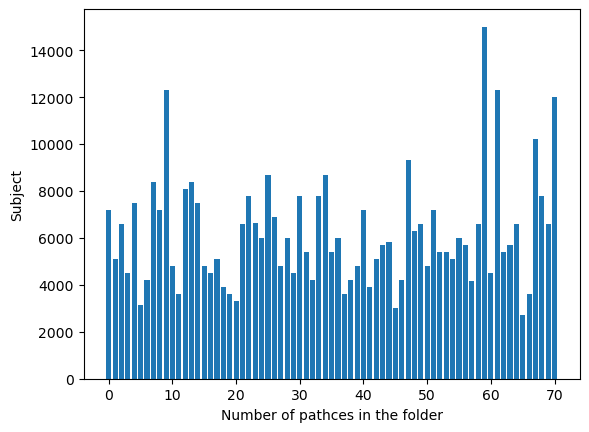

In [43]:
import numpy as np
plt.bar(np.arange(0, len(num_patchers_per_subject)), num_patchers_per_subject)
not_devisible = [num for num in num_patchers_per_subject if num%300!=0 ]
plt.xlabel('Number of pathces in the folder')
plt.ylabel('Subject')
print(not_devisible)
print(odd_subjects)
print(len(not_devisible))

In [56]:
new_df[new_df['path']].str.contains('APERIO-050-0')

0         True
1         True
2         True
3         True
4         True
         ...  
85195    False
85196    False
85197    False
85198    False
85199    False
Name: path, Length: 85200, dtype: bool

In [43]:
from PIL import Image
from torchvision import transforms

# path='../../../../gpfs_projects/alexej.gossmann/WashU-WSI-data/patches_WashU_Aperio/data/png_files/'
subjects = os.listdir(path)
patch_sizes = []
counter =0 
for subject in subjects:
    subject_path=os.path.join(path, subject)
    for patches in os.listdir(subject_path):
        img_loc = os.path.join(subject_path, patches)
        image = Image.open(img_loc)
        image = transforms.ToTensor()(image)
        patch_sizes.append(image.shape)
        #print(img_loc, image.shape)
        counter+=1
        if counter>1000:
            break

       
    

In [20]:
new_df[new_df['region'].str.contains('0Outside')]

path subject    region  \
24900  APERIO-127-0/aperio-127-0_anno_3_reg_0Outside_...      27  0Outside   
24901  APERIO-127-0/aperio-127-0_anno_3_reg_0Outside_...      27  0Outside   
24902  APERIO-127-0/aperio-127-0_anno_3_reg_0Outside_...      27  0Outside   
24903  APERIO-127-0/aperio-127-0_anno_3_reg_0Outside_...      27  0Outside   
24904  APERIO-127-0/aperio-127-0_anno_3_reg_0Outside_...      27  0Outside   
...                                                  ...     ...       ...   
58495  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58496  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58497  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58498  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   
58499  APERIO-049-0/aperio-049-0_anno_3_reg_0Outside_...      64  0Outside   

      ann resp age BMI Init_dx  
24900   3    1  37  59     CAH  
24901   3    1  37  59     CAH  
24902   3    1  37  59     CAH  
24903   3    1  37  59     CAH  
24904   3    1  37  59     CAH  
...    ..  ...  ..  ..     ...  
58495   3    1  31  40     CAH  
58496   3    1  31  40     CAH  
58497   3    1  31  40     CAH  
58498   3    1  31  40     CAH  
58499   3    1  31  40     CAH  

[1200 rows x 8 columns]

In [21]:
import re

In [27]:

region_label = [re.sub(r'\d', '', reg) for reg in new_df['region']]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

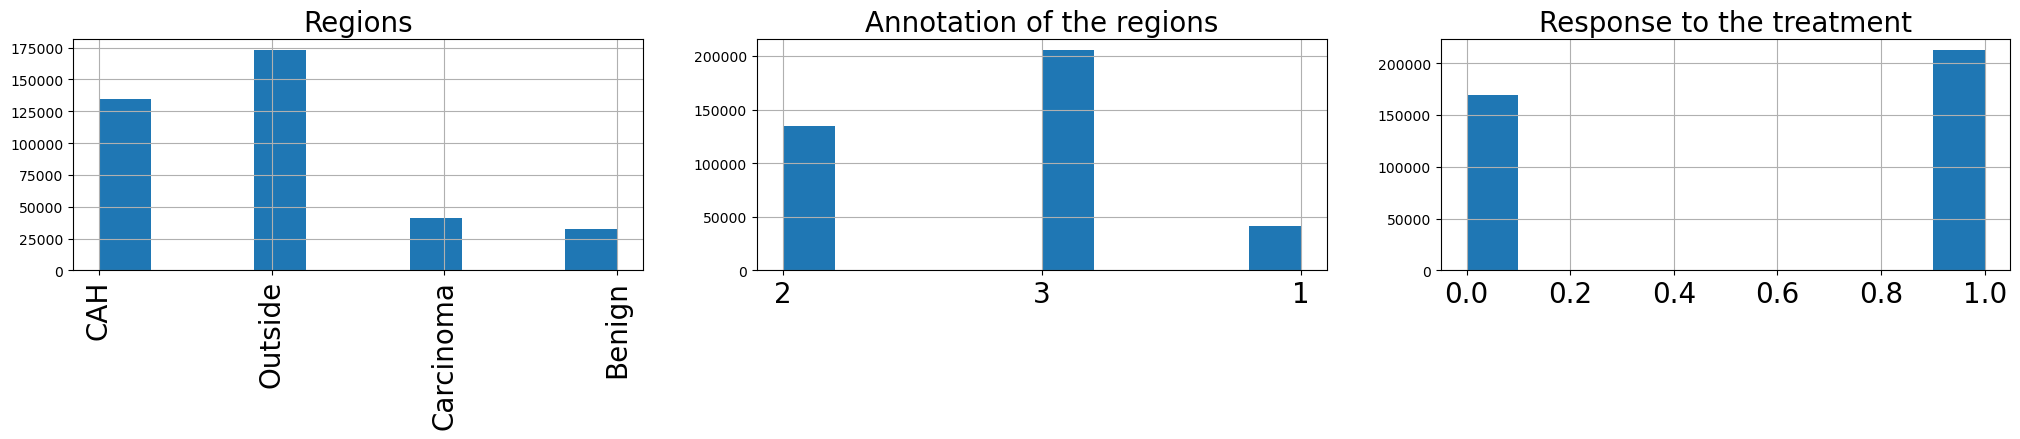

In [30]:
plt.figure(figsize = (25, 3))
fs = 20
plt.subplot(1, 3, 1)
plt.hist(region_label)
plt.xticks(rotation=90, fontsize = fs)
plt.grid()
plt.title('Regions',  fontsize = fs)

plt.subplot(1, 3, 2)
new_df['ann'].hist()
plt.title('Annotation of the regions', fontsize = fs)
plt.xticks(fontsize = fs)

plt.subplot(1, 3, 3)
new_df['resp'].hist()
plt.title('Response to the treatment',  fontsize = fs)
plt.xticks(fontsize = fs)

In [ ]:
new_df['resp'].unique()
new_df_ = new_df

In [ ]:

for ii in range(0, 70):
    print(ii, 'subject', new_df_[new_df_['subject']==ii]['region'].unique(), len(new_df_[new_df_['subject']==ii]) )
    # if len(new_df_[new_df_['subject']==ii])<1200:
    #     new_df
    



In [ ]:
# for ii in range(0, 35):

#     print('subject', new_df[new_df['subject']==ii].iloc[0,:])
#     print(len(new_df[new_df['subject']==ii]))


In [18]:
new_df.to_csv('../../dset_WEAH_65_subjects_3_regions.csv')

In [ ]:
new_df


In [ ]:
new_df[new_df['subject']==4]

In [78]:
import os
import torchvision
import torch
from PIL import Image
from torchvision import transforms
subj_path='../../../WashU_with_coord/TrainingOutside/'
counter=0
means = []
stds = []
images = []
for folder in os.listdir(subj_path):
    imgs = os.listdir(os.path.join(subj_path, folder))
    counter+=len(imgs)
    
    for img in imgs:
        img_ = Image.open(os.path.join(subj_path, folder,img))
        images.append(os.path.join(subj_path, folder,img))
        preprocess = transforms.Compose([transforms.ToTensor()])
        img_ = preprocess(img_)
        means.append(torch.mean(img_))
        stds.append(torch.std(img_))
        
        #plt.imshow(img.permute(1, 2, 0))
    # if counter>20000:
    #     break
    print(folder, 'done')
print(counter)

APERIO-126-0 done
APERIO-140-0 done
APERIO-098-0 done
APERIO-120-0 done
APERIO-023-0 done
APERIO-011-0 done
APERIO-002-0 done
APERIO-033-0 done
APERIO-136-0 done
APERIO-091-0 done
APERIO-115-0 done
APERIO-101-0 done
APERIO-108-0 done
APERIO-059-0 done
APERIO-118-0 done
APERIO-096-0 done
APERIO-075-0 done
APERIO-138-0 done
APERIO-047-0 done
APERIO-065-0 done
APERIO-123-0 done
APERIO-012-0 done
APERIO-077-0 done
APERIO-060-0 done
APERIO-010-0 done
APERIO-127-0 done
APERIO-076-0 done
APERIO-137-0 done
APERIO-141-0 done
APERIO-107-0 done
APERIO-117-0 done
APERIO-048-0 done
APERIO-133-0 done
APERIO-054-0 done
APERIO-036-0 done
APERIO-005-0 done
APERIO-001-0 done
APERIO-080-0 done
APERIO-007-0 done
APERIO-037-0 done
APERIO-008-0 done
APERIO-009-0 done
APERIO-092-0 done
APERIO-021-0 done
APERIO-029-0 done
APERIO-016-0 done
APERIO-100-0 done
APERIO-015-0 done
APERIO-084-0 done
APERIO-119-0 done
APERIO-114-0 done
APERIO-139-0 done
APERIO-063-0 done
APERIO-086-0 done
APERIO-050-0 done
APERIO-071

In [67]:
import matplotlib.pyplot as plt

(array([9.87000e+02, 7.14100e+03, 1.18040e+04, 4.49120e+04, 1.03249e+05,
        4.05420e+04, 2.71300e+03, 9.80000e+01, 6.00000e+00, 3.00000e+00]),
 array([0.        , 0.04987855, 0.09975709, 0.14963564, 0.19951418,
        0.24939273, 0.29927129, 0.34914982, 0.39902836, 0.44890693,
        0.49878547]),
 <BarContainer object of 10 artists>)

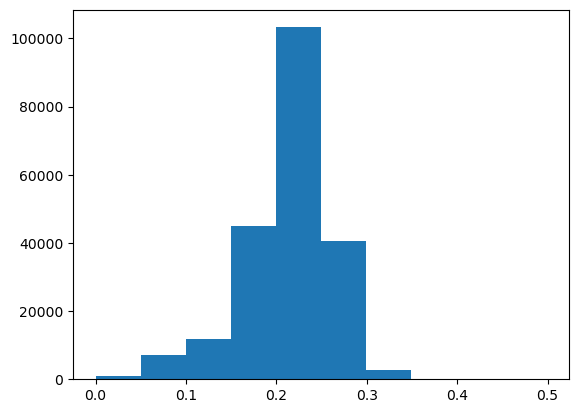

In [79]:
plt.hist(stds)

In [98]:
inds=[]
for index, value in enumerate(stds):
    if value>0.05 and value<0.1:
        inds.append(index)

In [99]:
len(inds)

7201

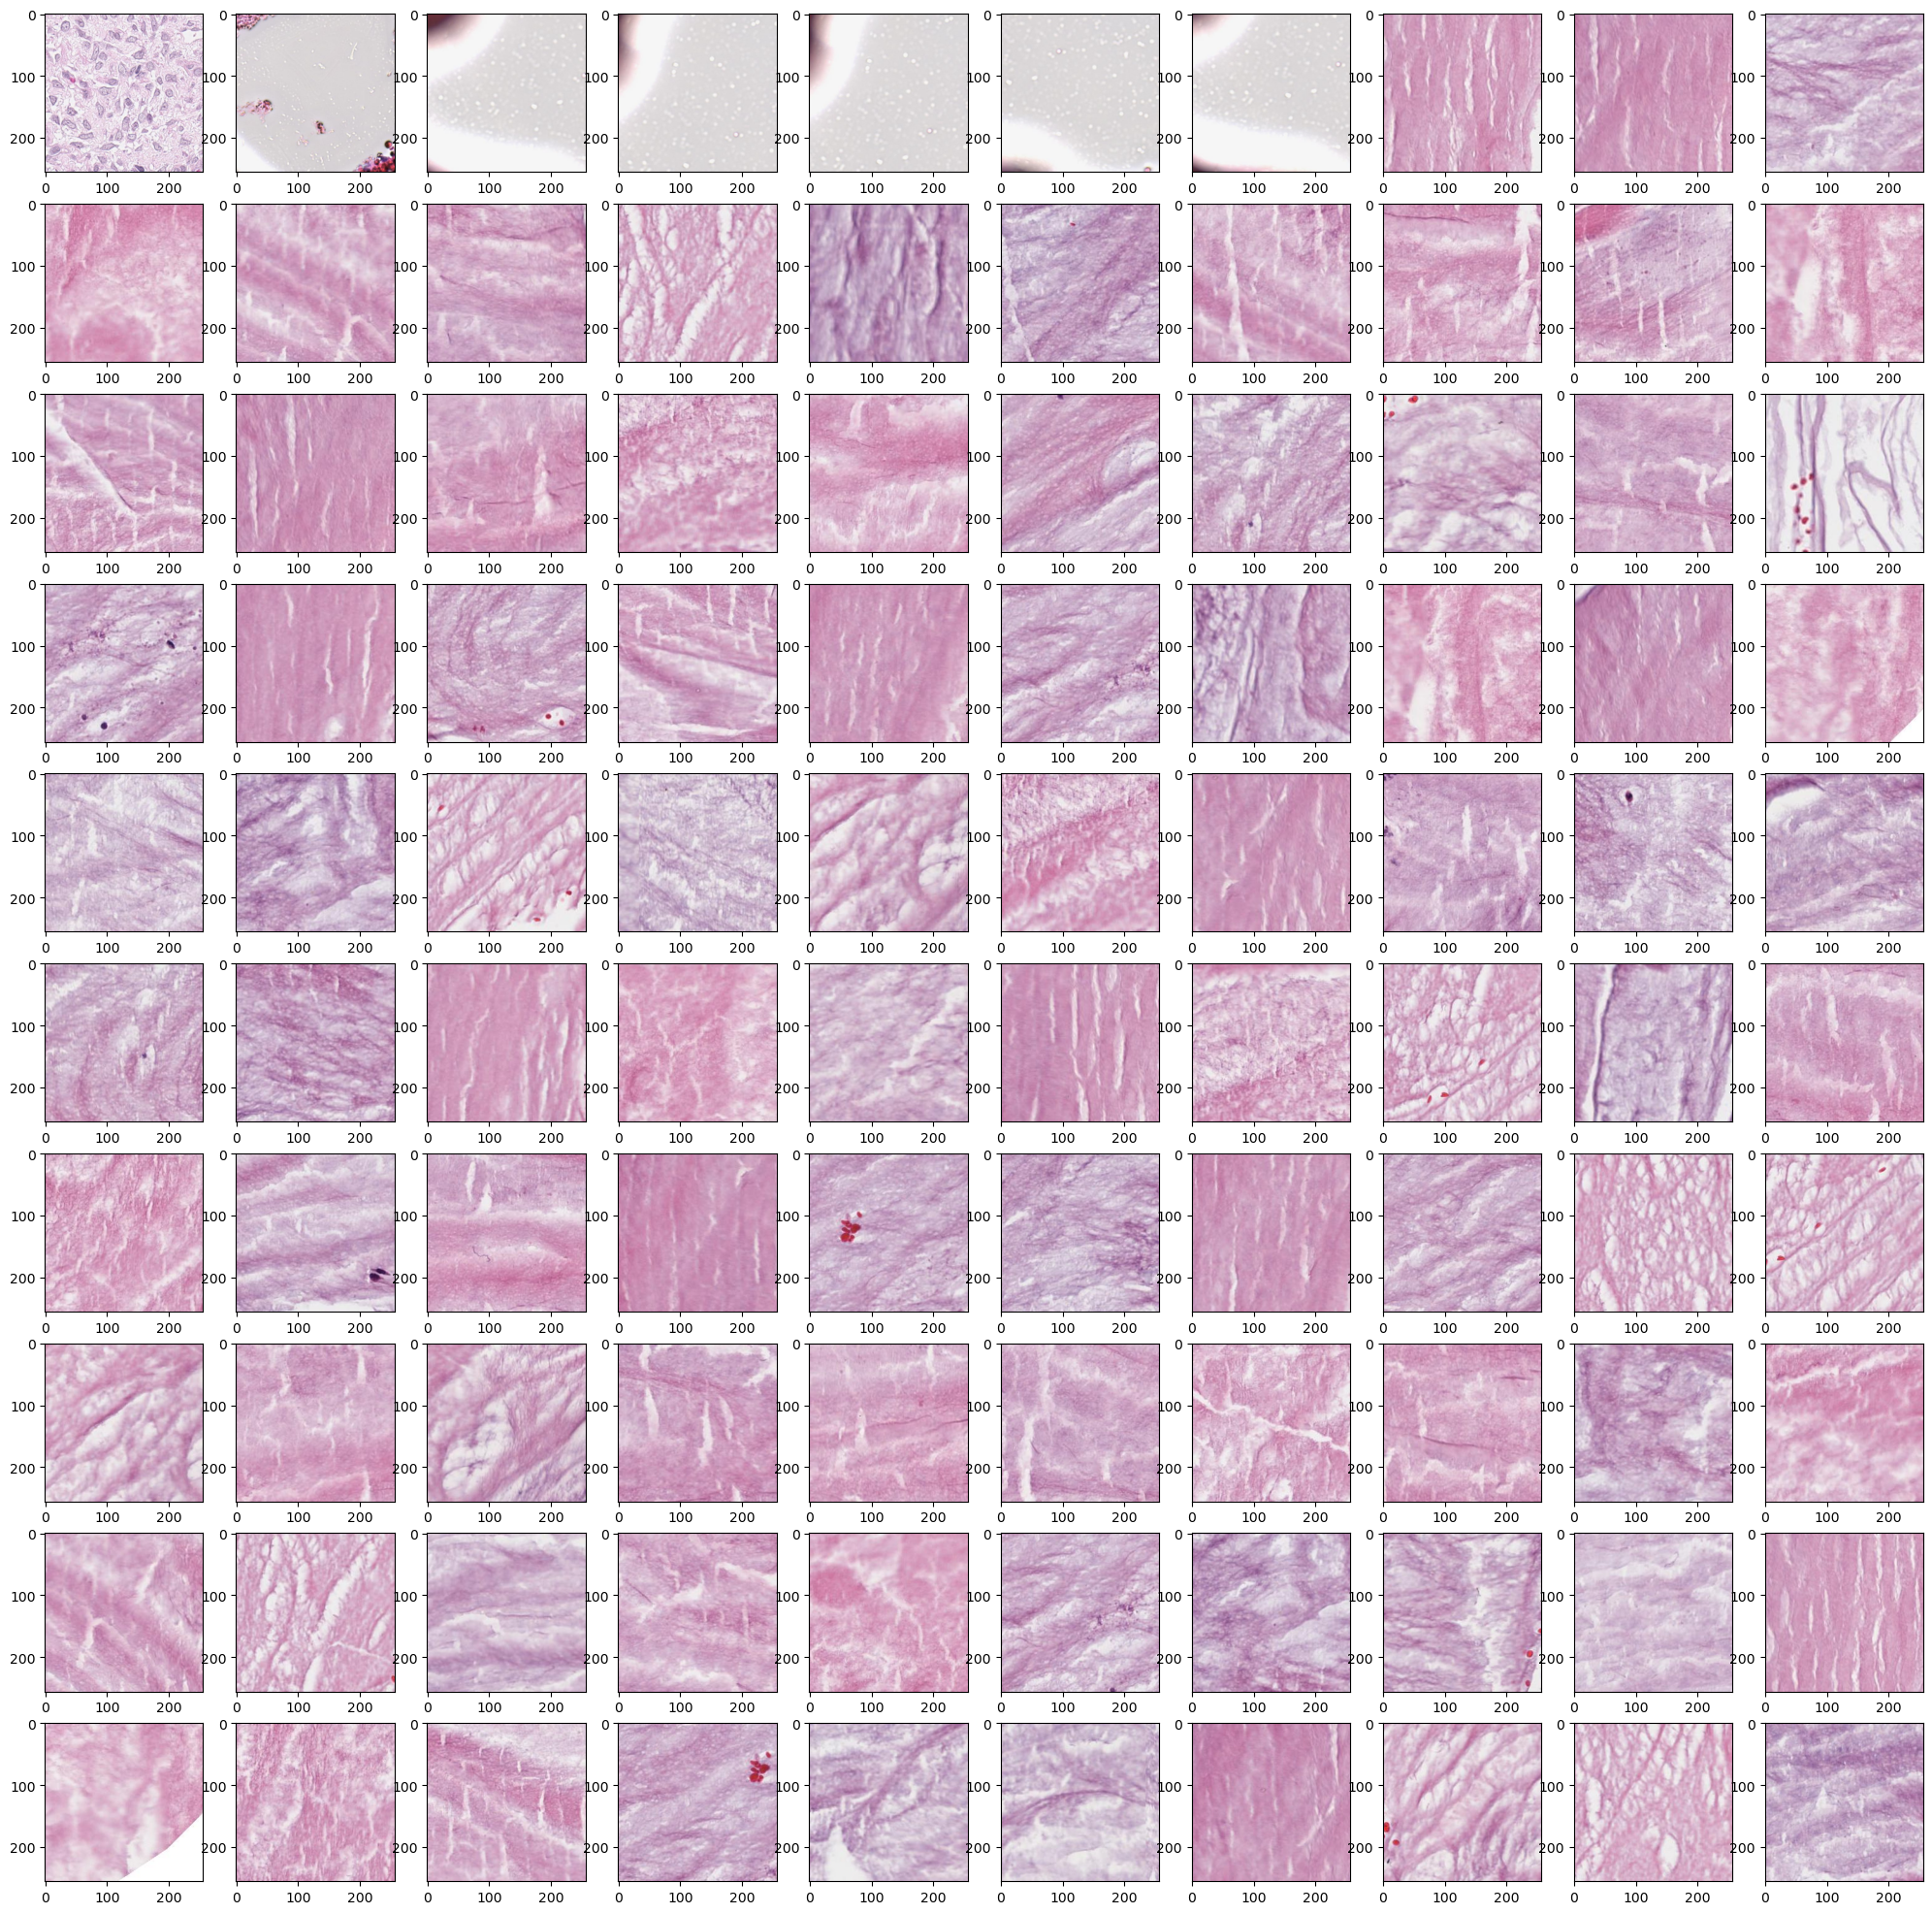

In [100]:
plt.figure(figsize=(25, 25))
j=0
for i in range(0, 100):
    #print(images[inds[i]])
    image_path = images[inds[-i]] #os.path.join(subj_path, 'APERIO-140-0',images[inds[i]] )
    image_show = torchvision.io.read_image(image_path)
    plt.subplot(10, 10, j+1)
    plt.imshow(image_show.permute(1, 2, 0))
    j+=1
    # plt.subplot(1, 10, i)
    # plt.imshow(show_img)
plt.show()